In [15]:
import os
import joblib
import numpy as np
from qsc import Qsc
from keras.models import load_model

params = {'results_path': 'results',
          'data_path': 'data',
          'nfp': 2,
          'model': 'nn',
          }

model_path = os.path.join(params['results_path'], f"nfp{params['nfp']}", f"nn_qsc_nfp{params['nfp']}_model{params['model']}.h5")
scaler_x_path = os.path.join(params['results_path'], f"nfp{params['nfp']}", f"nn_qsc_nfp{params['nfp']}_scaler_x.pkl")
scaler_y_path = os.path.join(params['results_path'], f"nfp{params['nfp']}", f"nn_qsc_nfp{params['nfp']}_scaler_y.pkl")

model = load_model(model_path)
scaler_x = joblib.load(scaler_x_path)
scaler_y = joblib.load(scaler_y_path)

In [17]:
def make_prediction(model, scaler, input_data):
    input_data = np.array(input_data)
    input_data_scaled = scaler.transform(input_data.reshape(1, -1))
    prediction = model.predict(input_data_scaled)
    prediction = scaler_y.inverse_transform(prediction)[0]
    return prediction

In [31]:
## y = [0.3/iota, 0.06/r_singularity, elongation/8, 0.6/L_grad_B, 0.6/L_grad_grad_B, 0.3/min_R0]
# input_Y_data = [0.8965593422632465,0.2790316639917813,0.32832412510417563,0.5318013138126698,0.9097876088134079,1.6467156689650049,0.3360122536615774]
input_Y_data = [0.8,0.3,0.3,0.5,0.9,1.6,0.3]
prediction = make_prediction(model, scaler_x, input_Y_data)
prediction

1/1 [==============================] - 0s 18ms/step


array([-6.8256468e-02, -1.6419975e-01,  1.5784336e-02, -4.8443803e-04,
       -1.0441500e-03, -2.0293824e-04, -7.8973854e-01, -7.7998896e+00],
      dtype=float32)

In [32]:
# Print the results
n_axis_fourier_modes = int((len(prediction)-2)/2)
predicted_rc = np.append([1],prediction[0:2*n_axis_fourier_modes:2])
predicted_zs = np.append([0],prediction[1:2*n_axis_fourier_modes+1:2])
predicted_eta_bar = prediction[2*n_axis_fourier_modes]
predicted_B2c = prediction[2*n_axis_fourier_modes+1]
stel = Qsc(rc=predicted_rc, zs=predicted_zs, etabar=predicted_eta_bar, nfp=int(params['nfp']), B2c=predicted_B2c, order='r3', nphi=151)
print('------------------------------------------')
print(f'  predicted_rc      = {", ".join(["{:.3e}".format(i) for i in predicted_rc])}')
print(f'  predicted_zs      = {", ".join(["{:.3e}".format(i) for i in predicted_zs])}')
print(f'  predicted_etabar  = {predicted_eta_bar:.3e}')
print(f'  predicted_B2c     = {predicted_B2c:.3e}')
print('------------------------------------------')
print(f'  predicted_iota          = {stel.iota:.3e}')
print(f'  predicted_elongationion    = {stel.max_elongation:.3e}')
print(f'  predicted_L_gradB       = {stel.min_L_grad_B:.3e}')
print(f'  predicted_L_gradgradB   = {1/stel.grad_grad_B_inverse_scale_length:.3e}')
print(f'  predicted_B20_variation = {stel.B20_variation:.3e}')
print(f'  predicted_r_singularity = {stel.r_singularity:.3e}')

------------------------------------------
  predicted_rc      = 1.000e+00, -6.826e-02, 1.578e-02, -1.044e-03
  predicted_zs      = 0.000e+00, -1.642e-01, -4.844e-04, -2.029e-04
  predicted_etabar  = -7.897e-01
  predicted_B2c     = -7.800e+00
------------------------------------------
  predicted_iota          = -1.176e-01
  predicted_elongationion    = 2.744e+00
  predicted_L_gradB       = 6.742e-01
  predicted_L_gradgradB   = 2.880e-01
  predicted_B20_variation = 1.255e+00
  predicted_r_singularity = 1.032e-01


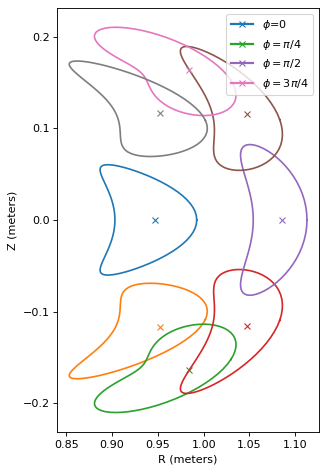

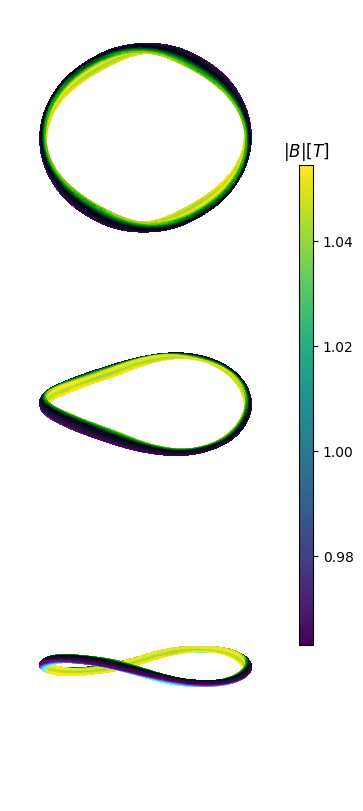

In [28]:
stel.plot_boundary(r=0.05)